In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import torch

In [2]:
# Define the path to your metadata CSV file
metadata_file = '../utils/Clinical Metadata FDG PET_CT Lesions.csv'  # replace with the actual path to your CSV file
output_directory = '../outputs/plotsDAPAtlas'  # Directory to save plots

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Try reading the CSV file with better error handling
original = pd.read_csv(metadata_file)


In [3]:
original

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,MELANOMA,063Y,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,MELANOMA,063Y,F
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,MELANOMA,061Y,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,MELANOMA,061Y,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,063Y,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,1.3.6.1.4.1.14519.5.2.1.4219.6651.268371672619...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff1451316e,1.3.6.1.4.1.14519.5.2.1.4219.6651.172967091722...,PET-CT Ganzkoerper primaer mit KM,3/31/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.53 MB,./FDG-PET-CT-Lesions/PETCT_ff1451316e/03-31-20...,2022-03-17T21:50:46.509,NEGATIVE,073Y,M
3038,1.3.6.1.4.1.14519.5.2.1.4219.6651.236102552014...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fe705ea1cc,1.3.6.1.4.1.14519.5.2.1.4219.6651.319090403244...,Unspecified CT ABDOMEN,12/29/2002,GK p.v.1 WF,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,1214,641.06 MB,./FDG-PET-CT-Lesions/PETCT_fe705ea1cc/12-29-20...,2022-03-17T21:51:00.132,LYMPHOMA,066Y,F
3039,1.3.6.1.4.1.14519.5.2.1.4219.6651.330497593503...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff39795341,1.3.6.1.4.1.14519.5.2.1.4219.6651.253687934564...,PET-CT Ganzkoerper primaer mit KM,9/22/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,11.13 MB,./FDG-PET-CT-Lesions/PETCT_ff39795341/09-22-20...,2022-03-17T21:51:04.996,NEGATIVE,073Y,F
3040,1.3.6.1.4.1.14519.5.2.1.4219.6651.117635362952...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff39795341,1.3.6.1.4.1.14519.5.2.1.4219.6651.253687934564...,PET-CT Ganzkoerper primaer mit KM,9/22/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,645,340.68 MB,./FDG-PET-CT-Lesions/PETCT_ff39795341/09-22-20...,2022-03-17T21:51:26.506,NEGATIVE,073Y,F


In [4]:
def get_AutoPetName(item):
    termination=item[item.rfind('/')-5:item.rfind('/')]
    item=item[item.find('Lesions/PETCT_')+len('Lesions/PETCT_'):]
    item=item[:item.find('/')]
    item=item+'_'+termination
    return 'AutoPET_'+item
metaItens=[]
for i,name in enumerate(original['File Location'],0):
    if original['Modality'][i]=='CT':
        pet=get_AutoPetName(original['File Location'][i])
        if pet in torch.load('../utils/DAPAtlasSamples.pt'):
            metaItens.append(pet)
print(len(metaItens))

533


In [5]:
metaItens

['AutoPET_0011f3deaf_10445',
 'AutoPET_01140d52d8_56839',
 'AutoPET_0143bab87a_33529',
 'AutoPET_0168f65af8_82224',
 'AutoPET_0410759456_75415',
 'AutoPET_0410759456_20805',
 'AutoPET_04606080a0_22538',
 'AutoPET_04ab5c61c9_42241',
 'AutoPET_05808cf24e_91344',
 'AutoPET_05bed31780_09401',
 'AutoPET_05d5a79faf_20586',
 'AutoPET_06e7c24059_97021',
 'AutoPET_07574bfa00_91235',
 'AutoPET_07b7e9abfc_08717',
 'AutoPET_08198c4f0c_57428',
 'AutoPET_098c4b7b87_71743',
 'AutoPET_099b3fd402_84728',
 'AutoPET_0af7ffe12a_96698',
 'AutoPET_0b57b247b6_42966',
 'AutoPET_0b98dbe00d_83616',
 'AutoPET_0c13e4df10_89759',
 'AutoPET_0dbf2c2731_07954',
 'AutoPET_0e2034240b_08517',
 'AutoPET_0e9a98ecda_36915',
 'AutoPET_0fa313309d_29055',
 'AutoPET_0fa313309d_74496',
 'AutoPET_1019ae8551_62131',
 'AutoPET_11e258cc1f_87979',
 'AutoPET_12025abab5_18831',
 'AutoPET_1285b86bea_49419',
 'AutoPET_13d0984c93_48750',
 'AutoPET_1472967bef_48645',
 'AutoPET_14929994cf_47251',
 'AutoPET_14c4d2c208_60478',
 'AutoPET_15a2

In [6]:
df = pd.DataFrame(columns=original.columns)
for index, row in original.iterrows():
    if row['Modality']=='CT' and get_AutoPetName(row['File Location']) in torch.load('../utils/DAPAtlasSamples.pt'):
        if row['age'][-1]=='Y':
            row['age']=int(row['age'][:-1])
        df = df.append(row, ignore_index=True)

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_76606/2425464370.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [7]:
df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,63,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.340214977928...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,366,193.37 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:54:18.995,MELANOMA,61,M
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.139507561280...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0143bab87a,1.3.6.1.4.1.14519.5.2.1.4219.6651.335264930457...,PET-CT Ganzkoerper primaer mit KM,7/17/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,345,182.27 MB,./FDG-PET-CT-Lesions/PETCT_0143bab87a/07-17-20...,2022-03-17T12:54:47.556,NEGATIVE,84,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.913380603297...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0168f65af8,1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...,PET-CT Ganzkoerper primaer mit KM,4/4/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0168f65af8/04-04-20...,2022-03-17T12:55:51.533,LUNG_CANCER,73,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.125265645176...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0410759456,1.3.6.1.4.1.14519.5.2.1.4219.6651.215436249461...,PET-CT Ganzkoerper primaer mit KM,11/7/2002,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,340,179.58 MB,./FDG-PET-CT-Lesions/PETCT_0410759456/11-07-20...,2022-03-17T12:58:15.895,NEGATIVE,78,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1.3.6.1.4.1.14519.5.2.1.4219.6651.192944502182...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fb014a1ea0,1.3.6.1.4.1.14519.5.2.1.4219.6651.234502808892...,PET-CT Ganzkoerper primaer mit KM,12/1/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,360,190.16 MB,./FDG-PET-CT-Lesions/PETCT_fb014a1ea0/12-01-20...,2022-03-17T21:44:46.9,LYMPHOMA,57,F
529,1.3.6.1.4.1.14519.5.2.1.4219.6651.303584820397...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fbd907a179,1.3.6.1.4.1.14519.5.2.1.4219.6651.114084559043...,PET-CT Ganzkoerper primaer mit KM,10/4/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,340,179.58 MB,./FDG-PET-CT-Lesions/PETCT_fbd907a179/10-04-20...,2022-03-17T21:45:21.106,LYMPHOMA,49,F
530,1.3.6.1.4.1.14519.5.2.1.4219.6651.184001889332...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fde66dd53a,1.3.6.1.4.1.14519.5.2.1.4219.6651.194294292917...,PET-CT Ganzkoerper primaer mit KM,12/22/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,358,189.10 MB,./FDG-PET-CT-Lesions/PETCT_fde66dd53a/12-22-20...,2022-03-17T21:46:58.057,MELANOMA,78,F
531,1.3.6.1.4.1.14519.5.2.1.4219.6651.851230154647...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fe705ea1cc,1.3.6.1.4.1.14519.5.2.1.4219.6651.972577895642...,Unspecified CT ABDOMEN,4/27/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,340,179.54 MB,./FDG-PET-CT-Lesions/PETCT_fe705ea1cc/04-27-20...,2022-03-17T21:50:00.466,NEGATIVE,66,F


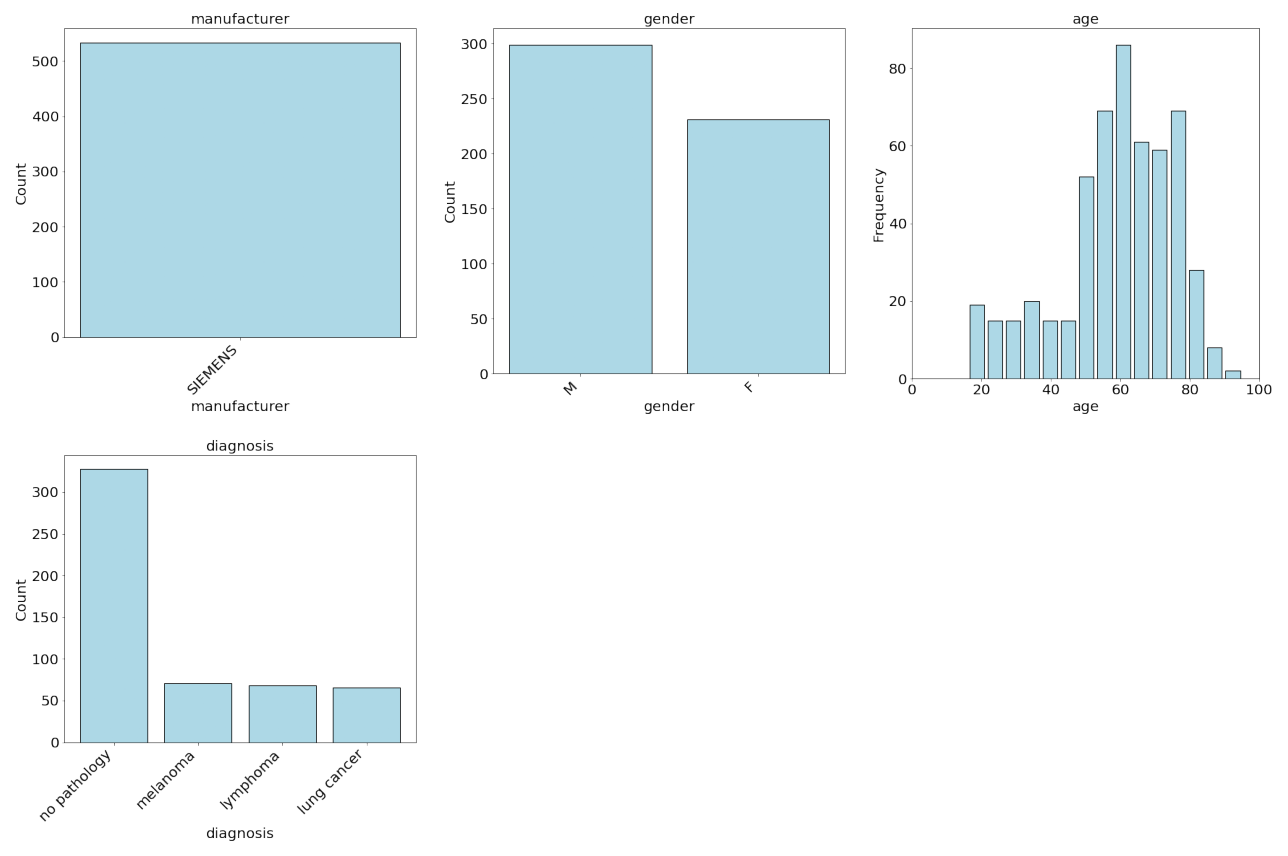

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your metadata CSV file
output_directory = '../outputs/plotsDAPAtlas'  # Directory to save plots
# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)


# Function to plot the distribution of each attribute
def plot_attribute_distribution(df, attribute, filename):
    if attribute not in df.columns:
        print(f"Attribute {attribute} not found in the dataset.")
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        plt.savefig(filename)
        plt.close()
        return
    
    #fig, ax = plt.subplots(figsize=(6, 4) if attribute == 'age' else (10, 8))
    #title_fontsize = 16
    #label_fontsize = 14
    #tick_fontsize = 12
    fig, ax = plt.subplots(figsize=(8, 8))
    title_fontsize = 20
    label_fontsize = 20
    tick_fontsize = 20
    if attribute == 'sex':
        title = 'gender'
    else:
        title = attribute.replace('_', ' ').lower()
    
    if attribute == 'age':
        # Plot histogram for age without KDE and with a small gap
        ax.hist(df[attribute].dropna(), bins=10, 
                edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_xlim(0, 100)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    elif attribute == 'diagnosis':
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ').str.lower()
        value_counts = value_counts.rename(index={"negative": "no pathology"})
        ax.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Count', fontsize=label_fontsize)
        plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    elif attribute in ['pathology_location', 'scanner_model']:
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.barh(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel('Count', fontsize=label_fontsize)
        ax.set_ylabel(title, fontsize=label_fontsize)
        plt.tight_layout()
    elif df[attribute].dtype == 'object':
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Count', fontsize=label_fontsize)
        plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    else:
        ax.hist(df[attribute].dropna(), bins=20, edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# List of attributes to plot
attributes = ['Manufacturer', 'sex', 'age', 'diagnosis']

# Generate and save individual plots for each attribute
for attribute in attributes:
    plot_filename = os.path.join(output_directory, f"{attribute}_distribution.png")
    plot_attribute_distribution(df, attribute, plot_filename)

# Combine all plots into one big image
fig, axes = plt.subplots(nrows=(len(attributes) + 2) // 3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    img = plt.imread(os.path.join(output_directory, f"{attribute}_distribution.png"))
    axes[i].imshow(img)
    axes[i].axis('off')
    # Removed setting title here to avoid duplication

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
combined_plot_path = os.path.join(output_directory, "combined_distributions.png")
plt.savefig(combined_plot_path)
plt.show()


# Divide by groups

In [8]:
gender={'male':[],
        'female':[]}
ages={'18-29':[],
      '30-39':[],
      '40-49':[],
      '50-59':[],
      '60-69':[],
      '70-79':[],
      '80-89':[],
      '90-99':[],
     }
diagnosis={'negative':[],
           'melanoma':[],
           'lymphoma':[],
           'lung cancer':[],}

cancer={'negative':[],
        'cancer':[]}

for index, row in df.iterrows():
    tmp=False
    for key in ages:
        if (row['age']>=int(key[:2]) and row['age']<=int(key[-2:])):
            ages[key].append(get_AutoPetName(row['File Location']))
            tmp=True
    if not tmp:
        print('Unrecognized value for age: ',row['age'])
    if row['sex']=='M':
        gender['male'].append(get_AutoPetName(row['File Location']))
    elif row['sex']=='F':
        gender['female'].append(get_AutoPetName(row['File Location']))
    else:
        print('Unrecognized value for sex: ',row['sex'])
    if row['diagnosis']=='MELANOMA':
        diagnosis['melanoma'].append(get_AutoPetName(row['File Location']))
        cancer['cancer'].append(get_AutoPetName(row['File Location']))
    elif row['diagnosis']=='LYMPHOMA':
        diagnosis['lymphoma'].append(get_AutoPetName(row['File Location']))
        cancer['cancer'].append(get_AutoPetName(row['File Location']))
    elif row['diagnosis']=='LUNG_CANCER':
        diagnosis['lung cancer'].append(get_AutoPetName(row['File Location']))
        cancer['cancer'].append(get_AutoPetName(row['File Location']))
    elif row['diagnosis']=='NEGATIVE':
        diagnosis['negative'].append(get_AutoPetName(row['File Location']))
        cancer['negative'].append(get_AutoPetName(row['File Location']))
    else:
        print('Unrecognized value for diagnosis: ',row['diagnosis'])

Unrecognized value for sex:  nan
Unrecognized value for sex:  nan
Unrecognized value for age:  16
Unrecognized value for sex:  nan
Unrecognized value for age:  17


In [29]:
gender

{'male': ['AutoPET_01140d52d8_56839',
  'AutoPET_0143bab87a_33529',
  'AutoPET_0168f65af8_82224',
  'AutoPET_05808cf24e_91344',
  'AutoPET_05bed31780_09401',
  'AutoPET_05d5a79faf_20586',
  'AutoPET_06e7c24059_97021',
  'AutoPET_07b7e9abfc_08717',
  'AutoPET_08198c4f0c_57428',
  'AutoPET_098c4b7b87_71743',
  'AutoPET_0b98dbe00d_83616',
  'AutoPET_0c13e4df10_89759',
  'AutoPET_0dbf2c2731_07954',
  'AutoPET_0e9a98ecda_36915',
  'AutoPET_12025abab5_18831',
  'AutoPET_1472967bef_48645',
  'AutoPET_15a205ffcc_93089',
  'AutoPET_15f4b7254f_44296',
  'AutoPET_1774857f8e_33663',
  'AutoPET_18e8b02af3_69934',
  'AutoPET_185da4c8b6_06919',
  'AutoPET_19838cb8e5_25383',
  'AutoPET_1a1712f7d0_78148',
  'AutoPET_1a1712f7d0_50630',
  'AutoPET_1a3d4e63ee_34298',
  'AutoPET_1a90052cb2_80674',
  'AutoPET_1bdefef7d5_32502',
  'AutoPET_1cb2d26a19_70937',
  'AutoPET_1f2a4f4280_44694',
  'AutoPET_1f2a4f4280_46988',
  'AutoPET_21853fc15b_55807',
  'AutoPET_249dd35d0c_75049',
  'AutoPET_25707f94a2_46163',
  

In [30]:
ages

{'18-29': ['AutoPET_04ab5c61c9_42241',
  'AutoPET_05bed31780_09401',
  'AutoPET_05d5a79faf_20586',
  'AutoPET_07574bfa00_91235',
  'AutoPET_0b57b247b6_42966',
  'AutoPET_11e258cc1f_87979',
  'AutoPET_2d9638360e_19870',
  'AutoPET_2f9aec0275_89491',
  'AutoPET_2f9aec0275_55211',
  'AutoPET_4785066413_27776',
  'AutoPET_4ea806706c_87631',
  'AutoPET_510fb36781_07563',
  'AutoPET_53ccb9efbb_33641',
  'AutoPET_5a274a0f26_16422',
  'AutoPET_5cf118ac06_95778',
  'AutoPET_68ef307665_38550',
  'AutoPET_68f73c4518_36034',
  'AutoPET_6a3477cd9a_52826',
  'AutoPET_790246c76c_97446',
  'AutoPET_7e56b0b62c_57089',
  'AutoPET_901573a747_32417',
  'AutoPET_90d668ed29_12980',
  'AutoPET_97320b0b58_10200',
  'AutoPET_9aa97cf103_81345',
  'AutoPET_9f206193d3_98703',
  'AutoPET_9f206193d3_09043',
  'AutoPET_aa27cb9156_81079',
  'AutoPET_ad7cd4a9d2_67897',
  'AutoPET_ae96f738c0_67749',
  'AutoPET_ae96f738c0_60169',
  'AutoPET_b2f82ed4b9_26753',
  'AutoPET_b2f82ed4b9_06609',
  'AutoPET_c29aba73da_89538',
 

In [31]:
diagnosis

{'negative': ['AutoPET_0143bab87a_33529',
  'AutoPET_0410759456_75415',
  'AutoPET_0410759456_20805',
  'AutoPET_05808cf24e_91344',
  'AutoPET_05bed31780_09401',
  'AutoPET_05d5a79faf_20586',
  'AutoPET_07b7e9abfc_08717',
  'AutoPET_08198c4f0c_57428',
  'AutoPET_098c4b7b87_71743',
  'AutoPET_0af7ffe12a_96698',
  'AutoPET_0c13e4df10_89759',
  'AutoPET_0dbf2c2731_07954',
  'AutoPET_0e9a98ecda_36915',
  'AutoPET_0fa313309d_74496',
  'AutoPET_14929994cf_47251',
  'AutoPET_1774857f8e_33663',
  'AutoPET_1781ba966c_99061',
  'AutoPET_182bdeba22_88669',
  'AutoPET_185bac7954_96761',
  'AutoPET_1956667fce_90464',
  'AutoPET_1a3d4e63ee_34298',
  'AutoPET_1a8bd52f71_99815',
  'AutoPET_1a90052cb2_80674',
  'AutoPET_1ac497ed9d_22078',
  'AutoPET_1bdefef7d5_32502',
  'AutoPET_1cb2d26a19_70937',
  'AutoPET_1f2a4f4280_44694',
  'AutoPET_1f2a4f4280_46988',
  'AutoPET_1fa22c576e_16838',
  'AutoPET_20f4a3aa02_72010',
  'AutoPET_234f8427c0_49172',
  'AutoPET_234f8427c0_25891',
  'AutoPET_249c02c01c_83154'

In [32]:
tmp=0
for key in gender:
    tmp+=len(gender[key])
print(tmp)

530


In [33]:
tmp=0
for key in diagnosis:
    tmp+=len(diagnosis[key])
print(tmp)

533


In [34]:
tmp=0
for key in ages:
    tmp+=len(ages[key])
print(tmp)

531


In [9]:
tmp=0
for key in cancer:
    tmp+=len(cancer[key])
print(tmp)

533


In [11]:
import torch
torch.save(gender['male'],output_directory+'/sex_male_autopet.pt')
torch.save(gender['female'],output_directory+'/sex_female_autopet.pt')
for key in ages:
    torch.save(ages[key],output_directory+'/ages_'+key+'_autopet.pt')
for key in diagnosis:
    torch.save(diagnosis[key],output_directory+'/diagnosis_'+key+'_autopet.pt')
for key in cancer:
    torch.save(cancer[key],output_directory+'/cancer_diagnosis_'+key+'_autopet.pt')
